# Exploratory Data Analysis - EDA

In [1]:
# Load the Data

In [2]:
#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pandas.plotting import lag_plot

In [3]:
#Load the data
df = pd.read_csv("Gold_data.csv"
                )

In [4]:
df['date'] = pd.to_datetime(df['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [5]:
#View the data
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


# 1. Basic information about data - EDA

### The df.info() function will give us the basic information about the dataset. For any data, it is good to start by knowing its information. Let’s see how it works with our data.

In [6]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [7]:
df.shape

(2182, 2)

### Using this function, you can see the number of null values, datatypes, and memory usage as shown in the above outputs along with descriptive statistics.

In [8]:
#Describe the data
# Describe the data - Descriptive statistics.
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [9]:
df.median()

price    2879.8
dtype: float64

In [10]:
df.mode()

,date,price
0,2016-01-01,2598.7
1,2016-01-02,2892.7
2,2016-01-03,NaN
3,2016-01-04,NaN
4,2016-01-05,NaN
...,...,...
2177,2021-12-17,NaN
2178,2021-12-18,NaN
2179,2021-12-19,NaN
2180,2021-12-20,NaN


In [11]:
df.shape

(2182, 2)

In [12]:
print(f"Date range of gold prices available from - {df.loc[:,'date'][0]} to {df.loc[:,'date'][len(df)-1]}")

Date range of gold prices available from - 2016-01-01 00:00:00 to 2021-12-21 00:00:00


# 2. Duplicate values / Null Values

### Finding the null values is the most important step in the EDA. As I told many a time, ensuring the quality of data is paramount. So, let’s see how we can find the null values.

In [13]:
#Find null values

df.isnull().sum()

date     0
price    0
dtype: int64

### You can use the df.duplicate.sum() function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data

In [14]:
#Find the duplicates
df.duplicated().sum()

0

### Well, the function returned ‘0’. This means, there is not a single duplicate value present in our dataset and it is a very good thing to know.

# 3. Know the datatypes

### Knowing the datatypes which you are exploring is very important and an easy process too. Let’s see how it works.

In [15]:
#Datatypes
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

### That’s it. You have to use the dtypes function for this a shown and you will get the datatypes of each attribute.

# 3. Unique values in the data

### You can find the number of unique values in the particular column using unique() function in python.

In [16]:
#unique values
df['date'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', ...,
       '2021-12-19T00:00:00.000000000', '2021-12-20T00:00:00.000000000',
       '2021-12-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [17]:
df['price'].unique()

array([2252.6, 2454.5, 2708.1, ..., 4389.5, 4354.1, 4346.5])

### The unique() function has returned the unique values which are present in the data and it is pretty much cool!

# 4. Visualization

# 4.1 Line Plot

In [18]:
df_eda = df.copy()
df_eda.set_index('date', inplace=True)

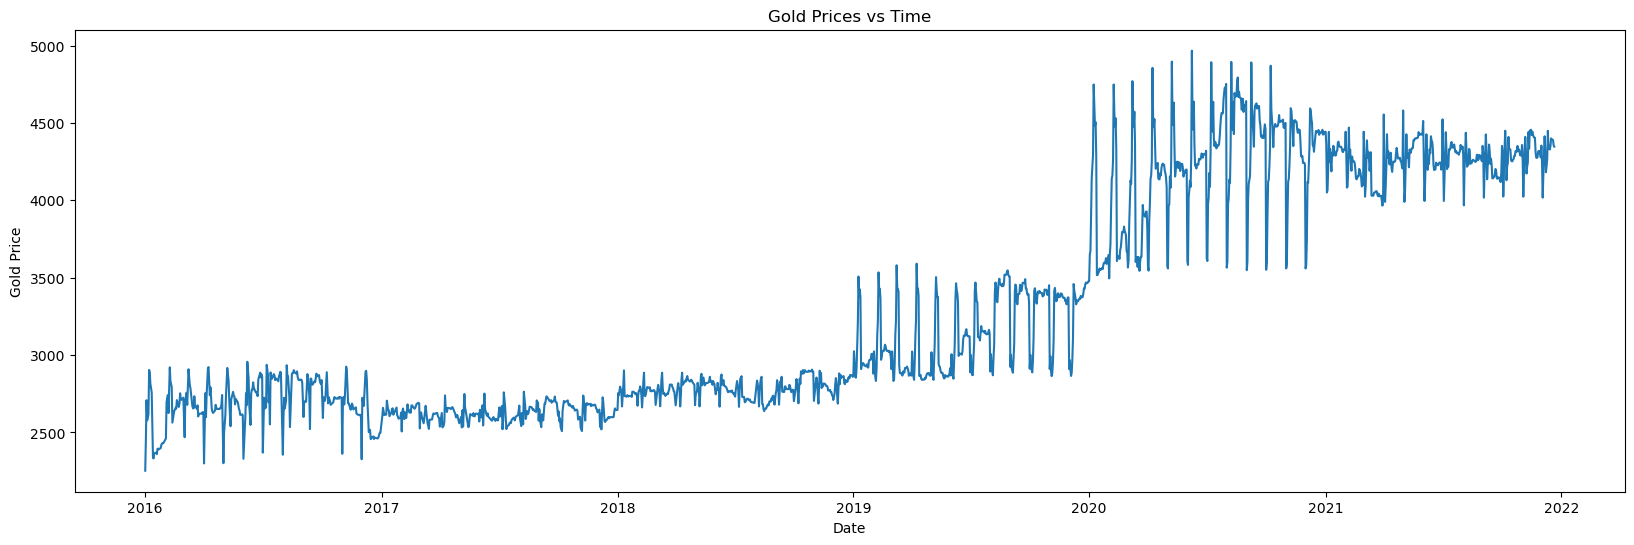

In [19]:
# line plot
plt.figure(figsize=(20, 6))
sns.lineplot(y='price', x='date', data=df);
plt.title('Gold Prices vs Time');
plt.xlabel('Date');
plt.ylabel('Gold Price');

# 4.2 Histogram

(array([ 65., 780., 422.,  49., 187.,  35., 104., 378., 146.,  16.]),
 array([2252.6 , 2523.97, 2795.34, 3066.71, 3338.08, 3609.45, 3880.82,
        4152.19, 4423.56, 4694.93, 4966.3 ]),
 <BarContainer object of 10 artists>)

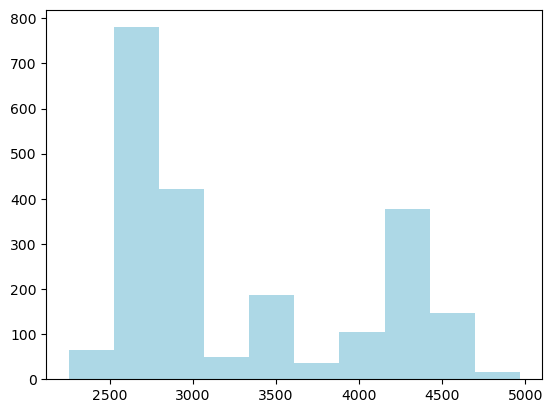

In [20]:
plt.hist(df['price'],color='lightblue')

# From above visual trend we can see that the data has different trend at Different levels hence it is Non-Stationary

# 4.3 A quick box plot
## Find Outliers in data

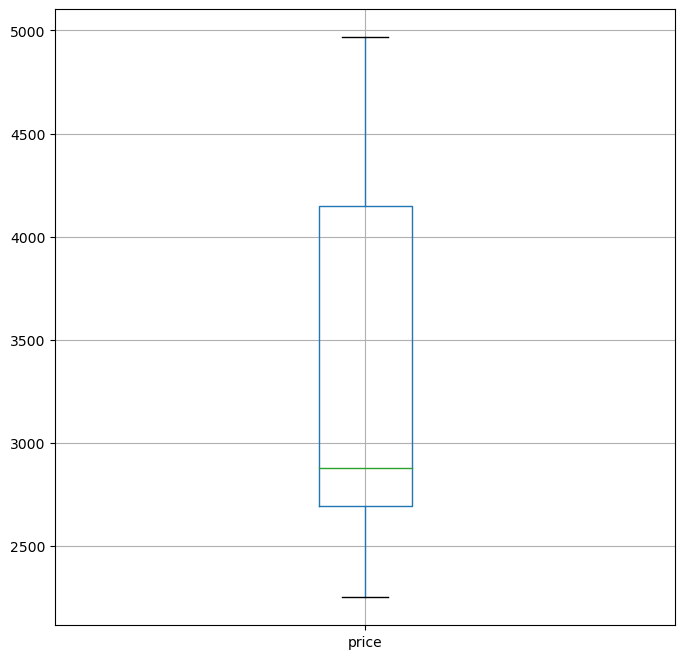

In [21]:
### you can create a box plot for any numerical column using a single line of code.
box=df.boxplot(figsize=(8,8))

## This data have irregular trend with combination of linear & constant treand over the time

# 4.4 Time series decomposition :

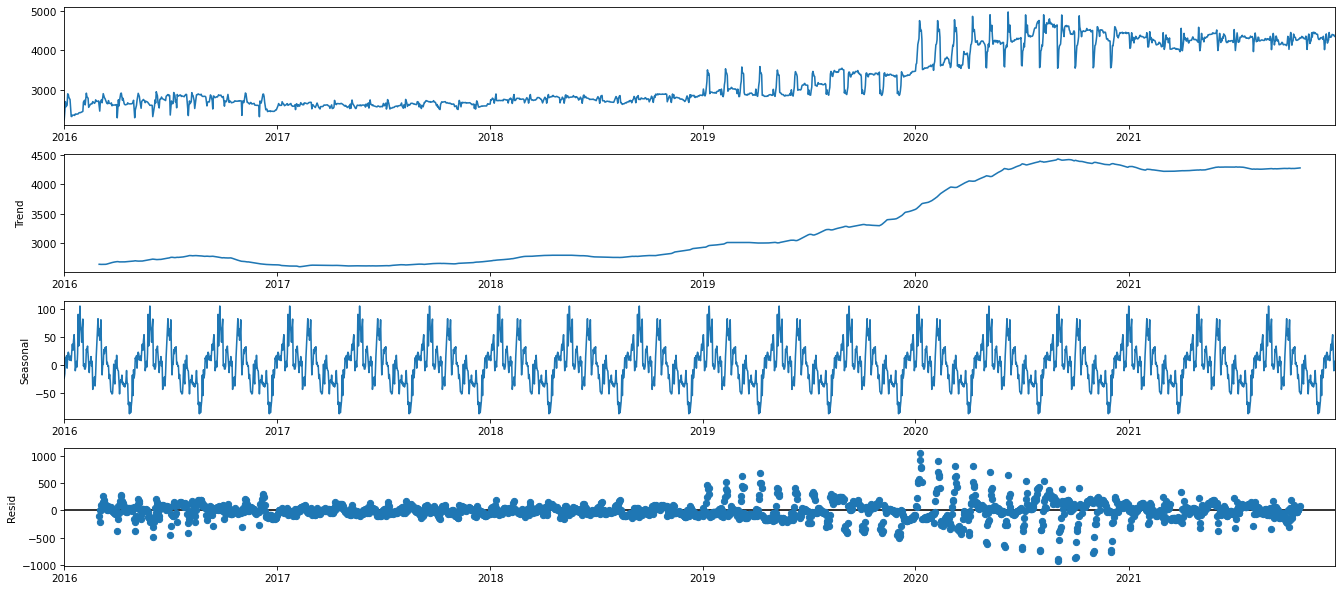

In [22]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})
result = seasonal_decompose(df_eda, model='additive', period=120)
result.plot()
plt.show()

## - Trend - Slow moving changes in a time series, Responisble for making series gradually increase or decrease over time.
## - Seasonality - Seasonal Paterns in the series. The cycles occur repeatedly over a fixed period of time.
## - Residuals - The behaviour of the time series that cannot be explained by the trend and seasonality components. Also called random errors/white noise.

# 4.5Trend
## Visualizing changes in mean over 365 days.

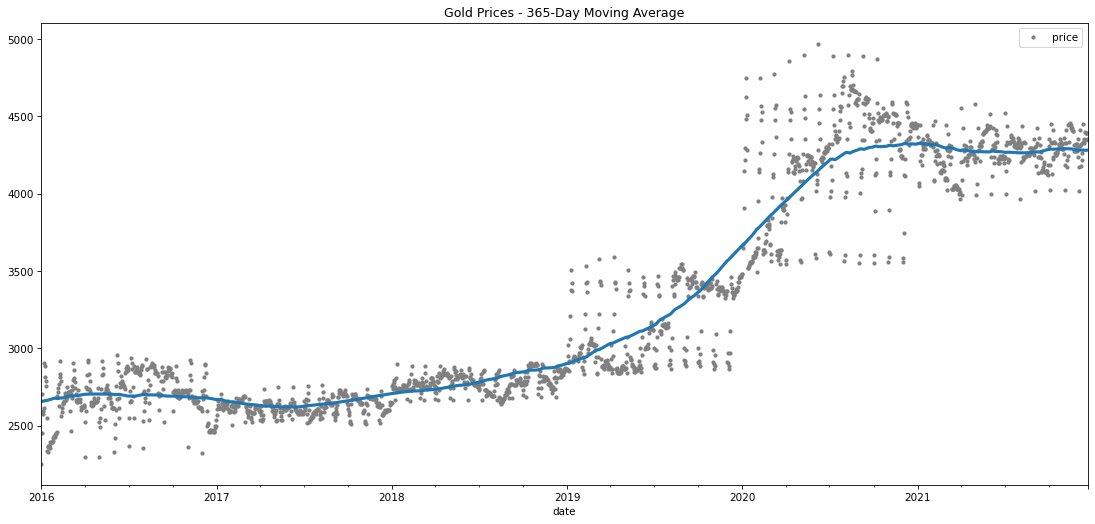

In [23]:
moving_average = df_eda.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df_eda.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Gold Prices - 365-Day Moving Average", legend=False,
);

# From the above plot, we can see that there is no constant direction of the mean (increase/decrease) which is understandable as there might be many external factors involved in price fluctuation.

# 4.6 Displot
## To Check Normality in the Data

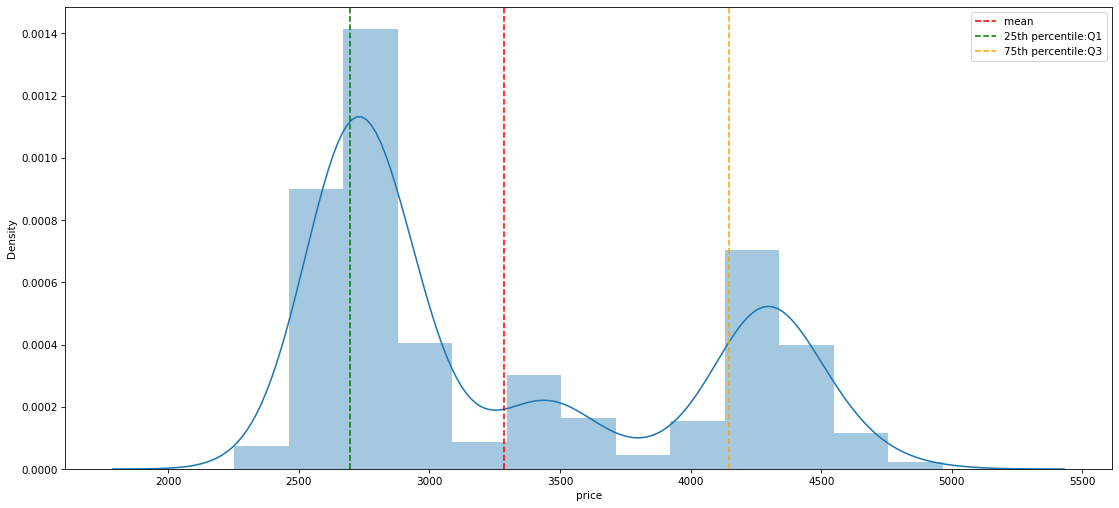

In [24]:
sns.distplot(df['price'])
plt.axvline(x=np.mean(df['price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

# We can see from above's Displot Data is not Normally Distibuted.

# 4.7 Scatter Plot

<Figure size 2250x600 with 0 Axes>

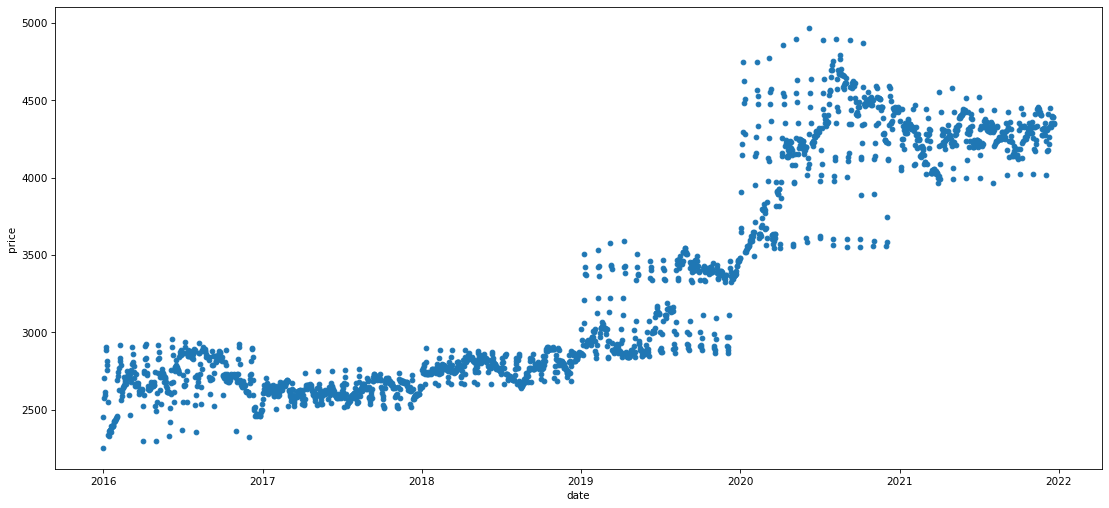

In [25]:
plt.figure(figsize=(30,8))
df.plot(kind='scatter',x='date',y='price')
plt.show()

# Observation :
## From above visualization we can see that there is variation in the gold price  .

In [26]:
date = pd.date_range(start='1/1/2016', end='21/12/2021', freq='M')

# 4.8 Let visualizing the sum of all sales each year. We can do that using group of “Price” and “Date” and group by “Year”.

In [27]:
df=df
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)
df_year = df[['price','year']].groupby(by='year').sum().reset_index()

df_year

,year,price
0,2016,9.847648e+05
1,2017,9.587369e+05
2,2018,1.015407e+06
3,2019,1.149827e+06
4,2020,1.543195e+06
5,2021,1.514739e+06


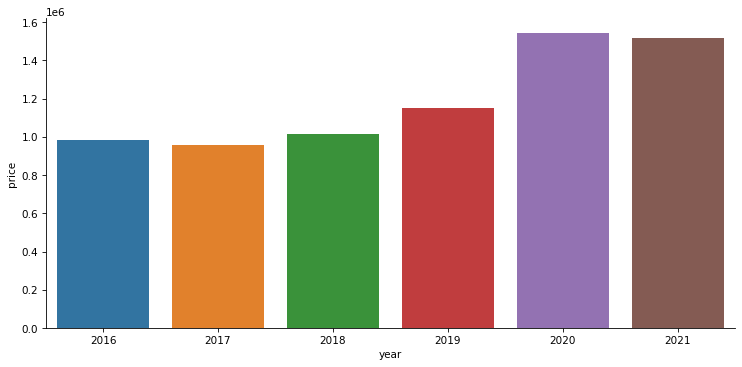

In [28]:
sns.catplot(x='year',y='price',data=df_year,kind='bar',aspect=2)

# Pie Chart

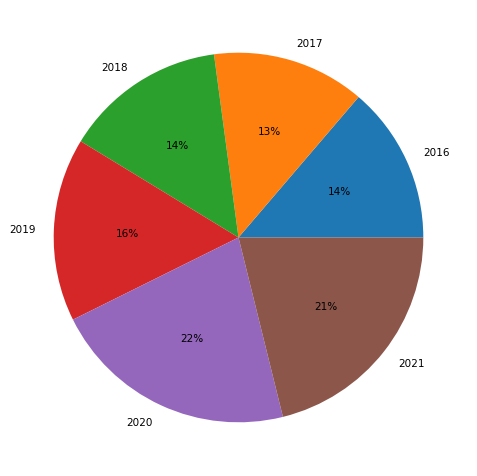

In [29]:
plt.pie(data=df_year,x=df_year['price'],labels=df_year['year'],autopct='%.0f%%')
plt.show()

# Monthly & Yearly Gold Price (TREND & SEASONALITY)

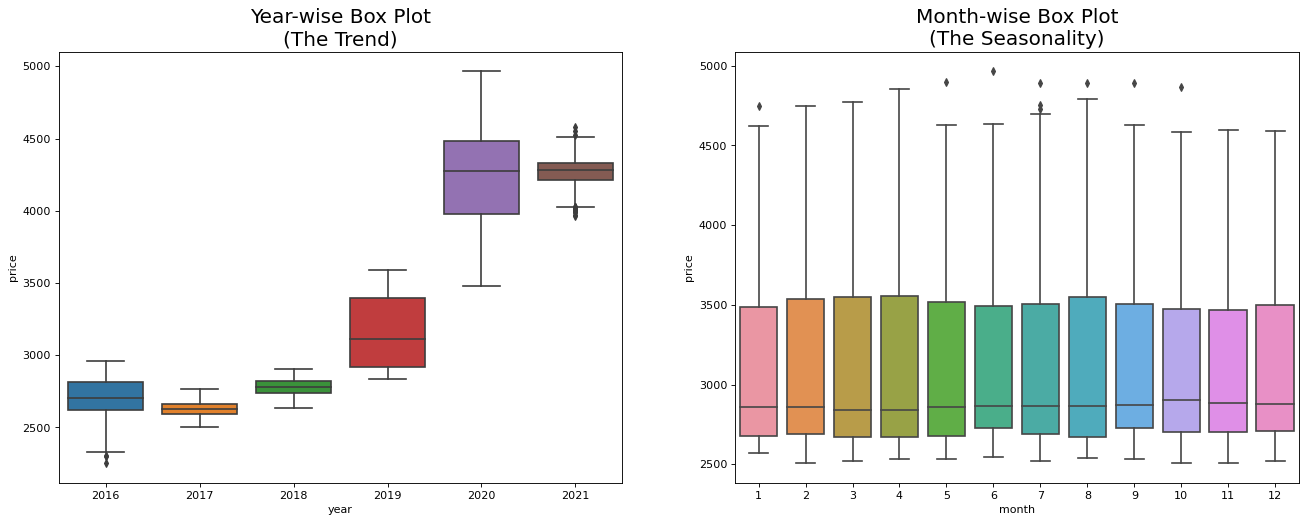

In [30]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='price', data=df, ax=axes[0])
sns.boxplot(x='month', y='price', data=df.loc[~df.year.isin([2016, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# Weekly Gold Price

# 1. Weekly Box Plot

[Text(0.5, 1.0, 'Weekly Gold Price')]

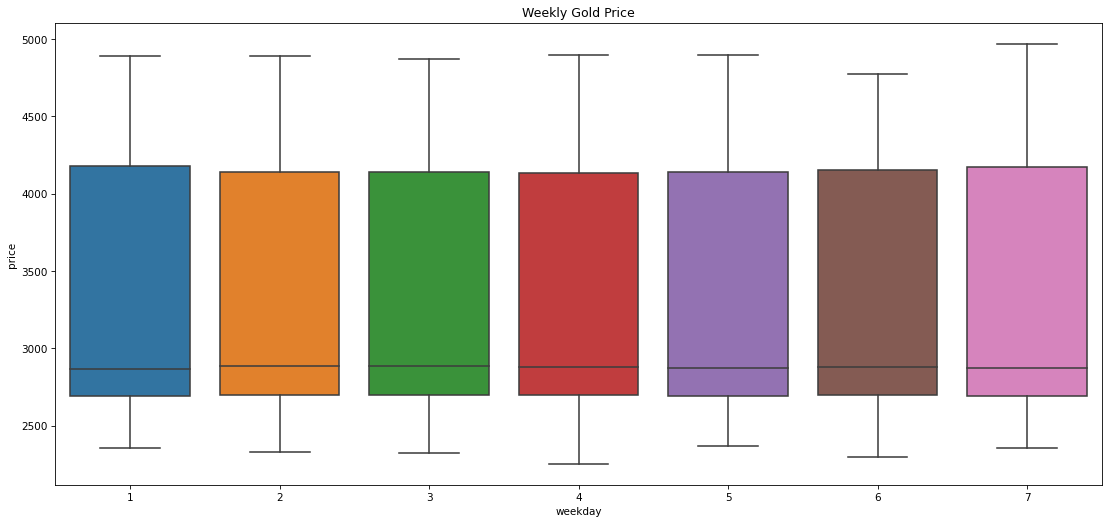

In [31]:
plot = sns.boxplot(x='weekday', y='price', data=df)
plot.set(title='Weekly Gold Price')

# 2. Weekly Violinplot

[Text(0.5, 1.0, 'Weekly Gold-- Price')]

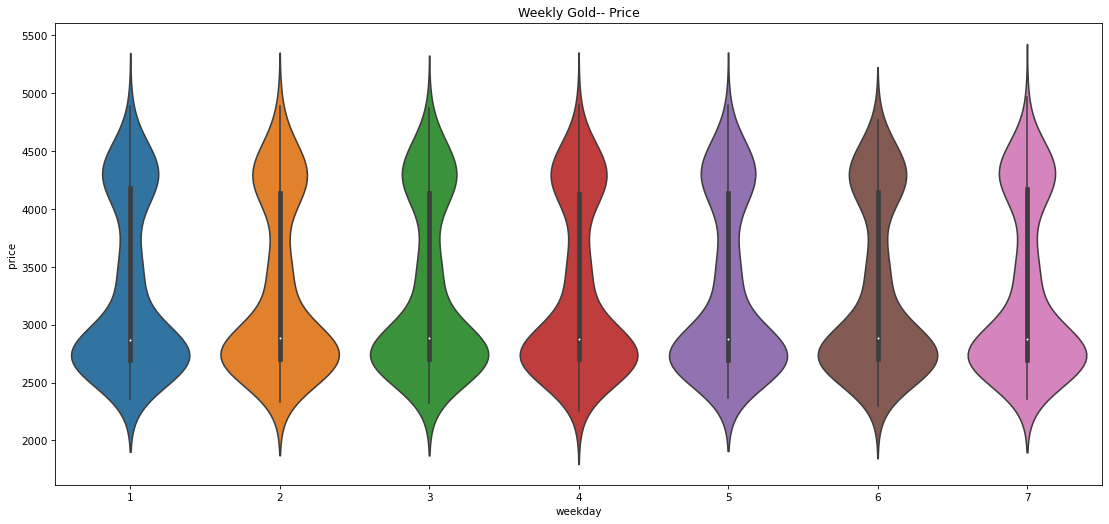

In [32]:
plot1 = sns.violinplot(x='weekday', y='price', data=df)
plot1.set(title='Weekly Gold-- Price')

# 8. Correlation Plot - EDA

### Finally, to find the correlation among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

In [33]:
#Correlation 

df.corr()

,price,year,month,day,weekday
price,1.000000,0.880318,0.075041,0.023311,-0.000928
year,0.880318,1.000000,-0.010417,-0.008684,-0.000735
month,0.075041,-0.010417,1.000000,0.001173,0.002167
day,0.023311,-0.008684,0.001173,1.000000,-0.002243
weekday,-0.000928,-0.000735,0.002167,-0.002243,1.000000


### This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated

<function matplotlib.pyplot.show(close=None, block=None)>

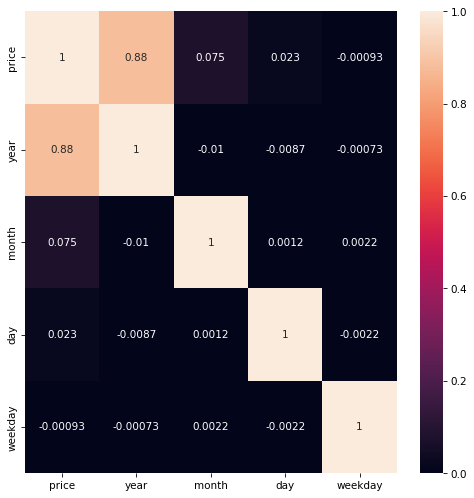

In [34]:
#Correlation plot

corr_matrix = df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(data= corr_matrix,annot=True,vmin=0)
plt.show

# 9. split the data

In [35]:
split=round(len(df)/2)
df_1=df[0:split]
df_2=df[split:]

In [36]:
df_1.mean()

price      2698.965628
year       2016.994500
month         6.496792
day          15.671861
weekday       4.000917
dtype: float64

In [37]:
df_2.mean()

price      3869.934464
year       2019.981668
month         6.496792
day          15.694775
weekday       4.001833
dtype: float64

In [38]:
df_1.var()

price      13222.816357
year           0.666025
month         11.822696
day           77.070207
weekday        4.006421
dtype: float64

In [39]:
df_2.var()

price      336585.171545
year            0.678563
month          11.822696
day            77.566386
weekday         4.003666
dtype: float64

Data splitting 80:20

In [40]:
X_train=df[:1827]
X_test=df[1827:]


print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)

X_train Shape (1827, 6)
X_test Shape (355, 6)


FORECASTING NINE MONTHS AHEAD

In [41]:
X_train = X_train[['date', 'price']]
X_test = X_test[['date', 'price']]

X_train.set_index('date', inplace=True)
X_test.set_index('date', inplace=True)

In [42]:
index_9_months = pd.date_range(X_test.index[-1], freq='MS', periods=9)
index_9_months

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01'],
              dtype='datetime64[ns]', freq='MS')

DEFINE d USING ADF TEST

In [43]:
from statsmodels.tsa.stattools import adfuller
def define_d(data):
    X_train = adfuller(data, autolag='AIC')
    adf = X_train[0]
    pvalue = X_train[1]
    critical_value = X_train[4]['5%']
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations', 'Critical Value']
    for value,label in zip(X_train,labels):
        print(label+' : '+str(value) )

    if (pvalue < 0.05):
        print("** Data Is Stationary **")
    else:
        print("** Indicating It Is Non-Stationary **")

define_d(X_train)

ADF Test Statistic : 0.40183775359213897
p-value : 0.9815635369454995
#Lags Used : 25
Number of Observations : 1801
Critical Value : {'1%': -3.4339861159726306, '5%': -2.863146142843122, '10%': -2.5676250581282964}
** Indicating It Is Non-Stationary **


From above ADF test we came to know that the data is non stationary

Converting non- stationary data into stationary data

In [44]:
data_diff = X_train.diff()
data_diff.dropna(inplace=True)
define_d(data_diff)

ADF Test Statistic : -19.514578834297566
p-value : 0.0
#Lags Used : 25
Number of Observations : 1800
Critical Value : {'1%': -3.4339881389288407, '5%': -2.863147035877915, '10%': -2.567625533641975}
** Data Is Stationary **


I define d = 1

DEFINE p AND q USING PACF AND ACF PLOT

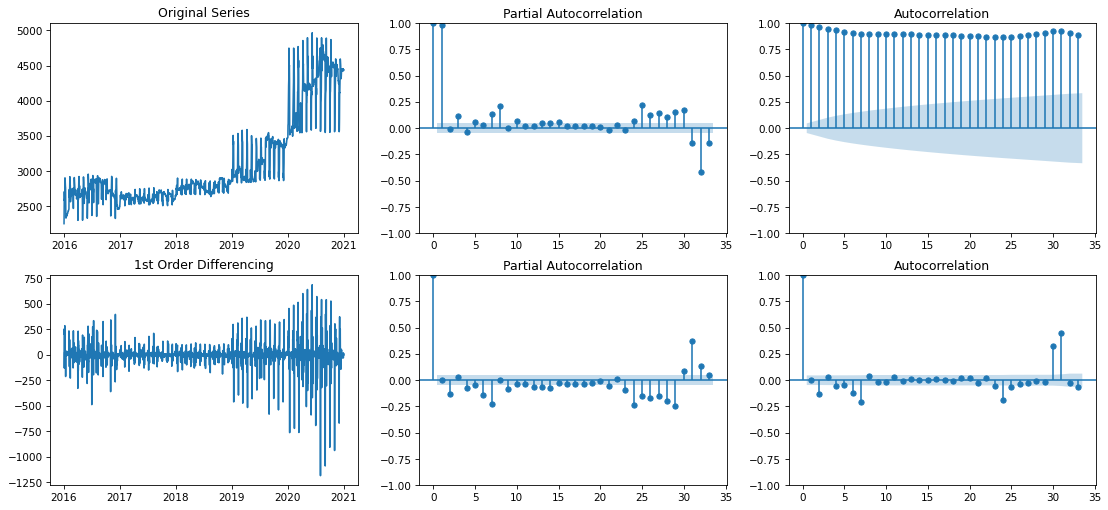

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})

# Original Series
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(X_train); axes[0, 0].set_title('Original Series')
plot_pacf(X_train, ax=axes[0, 1])
plot_acf(X_train, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(X_train.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(X_train.diff().dropna(), ax=axes[1, 1])
plot_acf(X_train.diff().dropna(), ax=axes[1, 2])

plt.show()


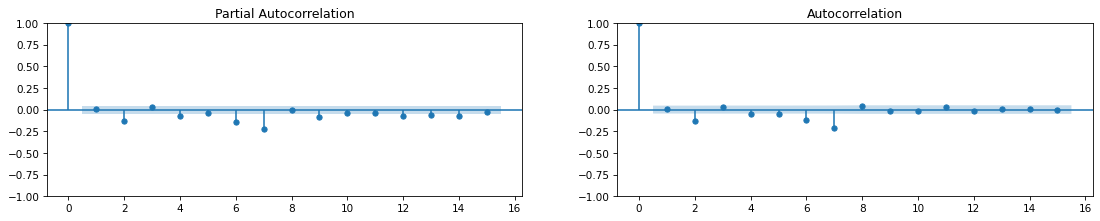

In [46]:
plt.rcParams.update({'figure.figsize':(18,3), 'figure.dpi':75})
fig, ax = plt.subplots(1, 2)
plot_pacf(X_train.diff().dropna(), lags = 15, ax=ax[0])
plot_acf(X_train.diff().dropna(), lags = 15, ax=ax[1])
plt.show()

Based on PACF and ACF, I define p = 0 and q = 0

In [47]:
from scipy.stats.mstats import normaltest
normaltest(df.price.values) #not a normal distribution

NormaltestResult(statistic=2809.5574975123573, pvalue=0.0)

In [48]:
log_price = np.log(df.price)
log_price

0       7.719840
1       7.805678
2       7.904003
3       7.854692
4       7.862401
          ...   
2177    8.388086
2178    8.386971
2179    8.386971
2180    8.378873
2181    8.377126
Name: price, Length: 2182, dtype: float64

<AxesSubplot:>

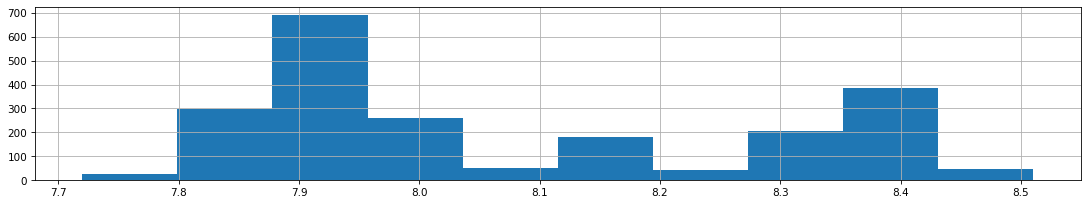

In [49]:
log_price.hist() 

In [50]:
normaltest(log_price)

NormaltestResult(statistic=64795.27133116441, pvalue=0.0)

SQUARE ROOT TRANSFORMATION

(array([ 45., 544., 627.,  93., 135.,  83.,  55., 355., 218.,  27.]),
 array([47.4615634 , 49.76260508, 52.06364677, 54.36468845, 56.66573014,
        58.96677182, 61.26781351, 63.56885519, 65.86989688, 68.17093856,
        70.47198025]),
 <BarContainer object of 10 artists>)

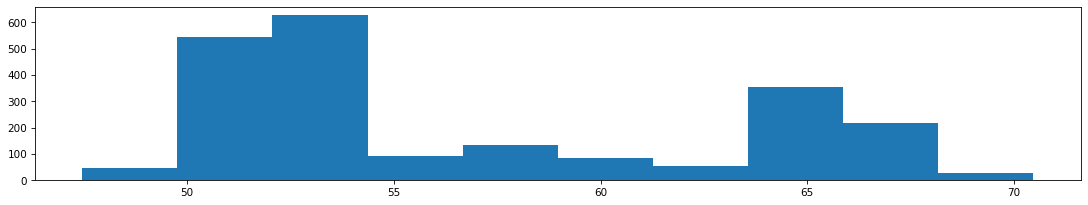

In [51]:
sqrt_price = np.sqrt(df.price)
plt.hist(sqrt_price)

In [52]:
normaltest(sqrt_price)

NormaltestResult(statistic=7072.617486825243, pvalue=0.0)

## Looking at the above results the mean and variance of the first part is very different from the second part. It shows another indication of non-stationary Of the data.

In [53]:
import pandas_profiling as pp
import sweetviz as sv

In [54]:
EDA_report= pp.ProfileReport(df)
EDA_report.to_file(output_file='report.html')

In [55]:
sweet_report = sv.analyze(df)
sweet_report.show_html('Gold_Price.html')

# MODEL BUILDING

###Spliting Data

In [126]:
df = pd.date_range(start='1/1/2016', end='21/12/2021', freq='M')
df

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
      

In [127]:
df = pd.read_csv("Gold_data.csv")
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [128]:
df['date'] = pd.to_datetime(df['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [129]:
df = df.set_index('date')

In [130]:
train    =   df[df.index.year <= 2020] 
test     =   df[df.index.year > 2020]

In [131]:
print(train.shape)
print(test.shape)

(1827, 1)
(355, 1)


In [132]:
print(train.shape)
print(test.shape)

(1827, 1)
(355, 1)


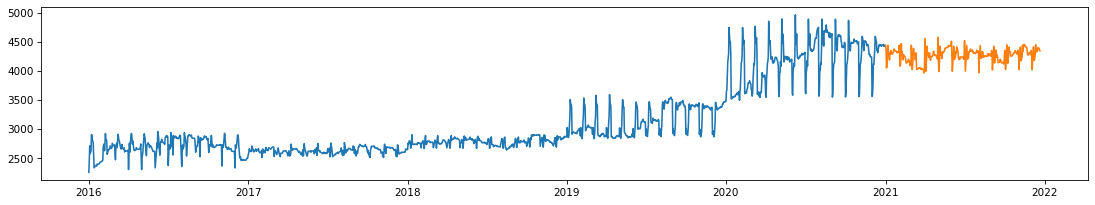

In [133]:
plt.plot(train)
plt.plot(test)
plt.show()

# ARIMA Model

In [134]:
# Figure out order for ARIMA Model
from pmdarima import auto_arima

In [135]:
stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22374.613, Time=1.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22546.376, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22548.368, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22548.362, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22544.571, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22516.950, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22518.306, Time=0.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22383.062, Time=2.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22381.946, Time=3.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22538.332, Time=0.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22380.067, Time=2.83 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22520.203, Time=0.93 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22353.693, Time=5.19 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=22336.770, Time=5.27 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1827
Model:               SARIMAX(4, 1, 2)   Log Likelihood              -11160.228
Date:                Thu, 22 Dec 2022   AIC                          22336.456
Time:                        17:34:33   BIC                          22380.535
Sample:                             0   HQIC                         22352.716
                               - 1827                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1731      0.098      1.757      0.079      -0.020       0.366
ar.L1          1.3041      0.098     13.240      0.000       1.111       1.497
ar.L2         -0.5338      0.088     -6.087      0.000      -0.706      -0.362
ar.L3          0.2187      0.034      6.499      0.000       0.153       0.285
ar.L4         -0.1737      0.020     -8.511      0.000      -0.214      -0.134
ma.L1         -1.4009      0.104    -13.436      0.000      -1.605      -1.197
ma.L2          0.4260      0.102      4.189      0.000       0.227       0.625
sigma2      1.201e+04    136.260     88.144      0.000    1.17e+04    1.23e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             46876.83
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               4.60   Skew:                            -1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['price'],order = (4,1,2))
result = model_arima.fit()
result.summary()

C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1827
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -11163.532
Date:                Thu, 22 Dec 2022   AIC                          22341.065
Time:                        17:34:37   BIC                          22379.634
Sample:                    01-01-2016   HQIC                         22355.292
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3390      0.094     14.214      0.000       1.154       1.524
ar.L2         -0.5555      0.084     -6.646      0.000      -0.719      -0.392
ar.L3          0.2026      0.033      6.178      0.000       0.138       0.267
ar.L4         -0.1589      0.020     -7.796      0.000      -0.199      -0.119
ma.L1         -1.4287      0.101    -14.181      0.000      -1.626      -1.231
ma.L2          0.4559      0.097      4.702      0.000       0.266       0.646
sigma2      1.195e+04    133.233     89.726      0.000    1.17e+04    1.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             48211.20
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+354,type='levels'))
test_pred.index = test.index
test_pred

,predicted_mean
date,
2021-01-01,4420.521815
2021-01-02,4406.329499
2021-01-03,4395.791768
2021-01-04,4385.776776
2021-01-05,4378.503431
...,...
2021-12-17,4383.732874
2021-12-18,4383.732874
2021-12-19,4383.732874


In [138]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1]   # To print ouput in date format
print(test_pred)

            predicted_mean
date                      
2021-01-01     4420.521815
2021-01-02     4406.329499
2021-01-03     4395.791768
2021-01-04     4385.776776
2021-01-05     4378.503431
...                    ...
2021-12-17     4383.732874
2021-12-18     4383.732874
2021-12-19     4383.732874
2021-12-20     4383.732874
2021-12-21     4383.732874

[355 rows x 1 columns]


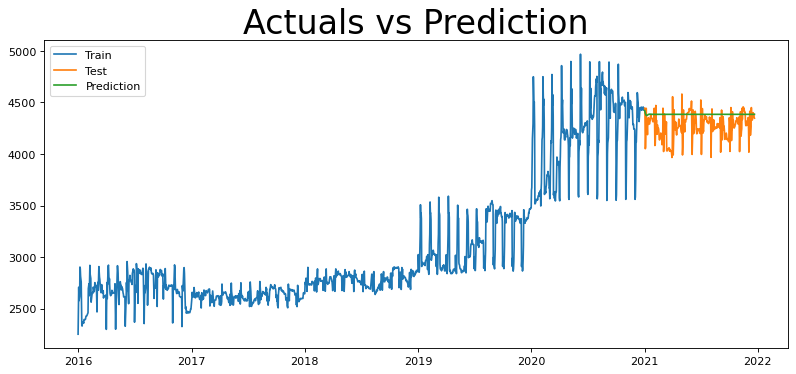

In [139]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction', size=30)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [140]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [141]:
mse = mean_squared_error(test_pred['predicted_mean'],test['price'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test.price)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test.price)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  26588.711956847164
Root Mean Squared Error (RMSE) =  163.06
Mean Absolute Error (MAE)  =  130.41112819519878
Mean Absolute Percentage Error (MAPE)  =  0.02974879558403102


# Forecast for the 30 Days

In [142]:
forecast = result.predict(len(df), len(df)+31, type = 'levels')
forecast
index_future_dates = pd.date_range(start='2021-12-21', end = '2022-01-21')
forecast.index=index_future_dates
print(forecast)

2021-12-21    4383.732874
2021-12-22    4383.732874
2021-12-23    4383.732874
2021-12-24    4383.732874
2021-12-25    4383.732874
2021-12-26    4383.732874
2021-12-27    4383.732874
2021-12-28    4383.732874
2021-12-29    4383.732874
2021-12-30    4383.732874
2021-12-31    4383.732874
2022-01-01    4383.732874
2022-01-02    4383.732874
2022-01-03    4383.732874
2022-01-04    4383.732874
2022-01-05    4383.732874
2022-01-06    4383.732874
2022-01-07    4383.732874
2022-01-08    4383.732874
2022-01-09    4383.732874
2022-01-10    4383.732874
2022-01-11    4383.732874
2022-01-12    4383.732874
2022-01-13    4383.732874
2022-01-14    4383.732874
2022-01-15    4383.732874
2022-01-16    4383.732874
2022-01-17    4383.732874
2022-01-18    4383.732874
2022-01-19    4383.732874
2022-01-20    4383.732874
2022-01-21    4383.732874
Freq: D, Name: predicted_mean, dtype: float64


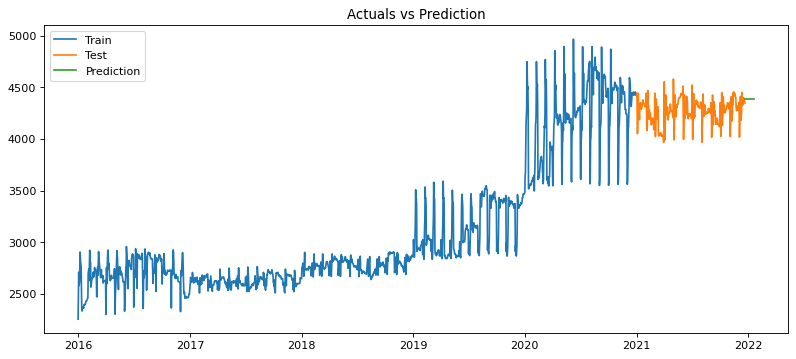

In [143]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

<AxesSubplot:>

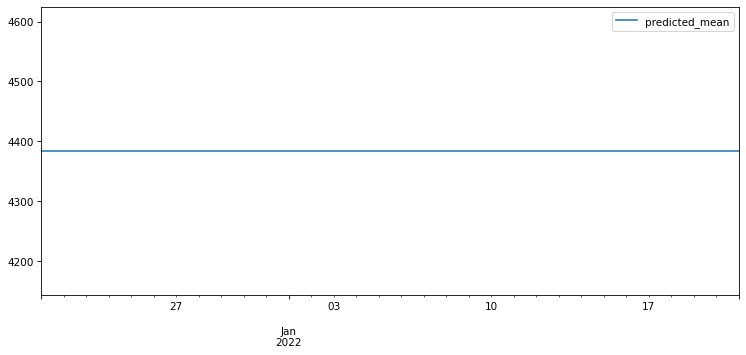

In [144]:
forecast.plot(figsize=(12,5), legend=True)

# SARIMA

In [145]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 22) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 22)
SARIMAX: (0, 1, 1) x (0, 1, 2, 22)
SARIMAX: (0, 1, 2) x (1, 1, 0, 22)
SARIMAX: (0, 1, 2) x (1, 1, 1, 22)


In [146]:
model_SA = sm.tsa.SARIMAX(train['price'], order=(0,1,2), seasonal_order=(1,1,1,22))
result_SA = model_SA.fit()
result_SA.summary()

C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                price   No. Observations:                 1827
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 22)   Log Likelihood              -11169.172
Date:                              Thu, 22 Dec 2022   AIC                          22348.343
Time:                                      17:35:59   BIC                          22375.832
Sample:                                  01-01-2016   HQIC                         22358.489
                                       - 12-31-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0070      0.017      0.414      0.679      -0.026       0.040
ma.L2         -0.1513      0.019     -7.943      0.000      -0.189      -0.114
ar.S.L22      -0.0054      0.026     -0.213      0.832      -0.056       0.045
ma.S.L22      -0.9993      0.269     -3.720      0.000      -1.526      -0.473
sigma2      1.325e+04   3487.090      3.800      0.000    6415.536    2.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             44803.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.81   Skew:                            -1.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+354,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

,predicted_mean
date,
2021-01-01,4438.091604
2021-01-02,4438.079563
2021-01-03,4436.990098
2021-01-04,4460.085738
2021-01-05,4457.025101
...,...
2021-12-17,4840.693652
2021-12-18,4856.702104
2021-12-19,4855.184609


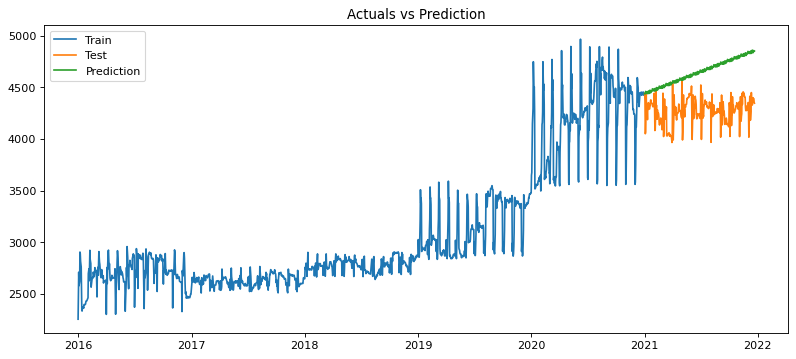

In [148]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['price'], label = 'Train')
plt.plot(test['price'], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [149]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['price'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test.price)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.price)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  168824.30881761093
Root Mean Squared Error (RMSE) =  410.88
Mean Absolute Error (MAE)  =  382.4677104856327
Mean Absolute Percentage Error (MAPE)  =  0.08175801972228905


# Forecast for next 30 Days

In [150]:
forecast_SA = result_SA.predict(len(df), len(df)+31, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2021-12-21', end = '2022-01-21')
forecast_SA.index=index_future_dates
print(forecast_SA)

2021-12-21    4873.980935
2021-12-22    4870.712510
2021-12-23    4868.887712
2021-12-24    4860.417765
2021-12-25    4855.642621
2021-12-26    4870.977275
2021-12-27    4870.199305
2021-12-28    4853.311625
2021-12-29    4869.014777
2021-12-30    4878.278375
2021-12-31    4876.378375
2022-01-01    4855.049228
2022-01-02    4869.126358
2022-01-03    4879.688624
2022-01-04    4886.428260
2022-01-05    4878.253407
2022-01-06    4861.001153
2022-01-07    4866.588822
2022-01-08    4882.597274
2022-01-09    4881.079780
2022-01-10    4878.755404
2022-01-11    4876.905311
2022-01-12    4899.876106
2022-01-13    4896.607680
2022-01-14    4894.782883
2022-01-15    4886.312936
2022-01-16    4881.537792
2022-01-17    4896.872446
2022-01-18    4896.094476
2022-01-19    4879.206796
2022-01-20    4894.909947
2022-01-21    4904.173546
Freq: D, Name: predicted_mean, dtype: float64


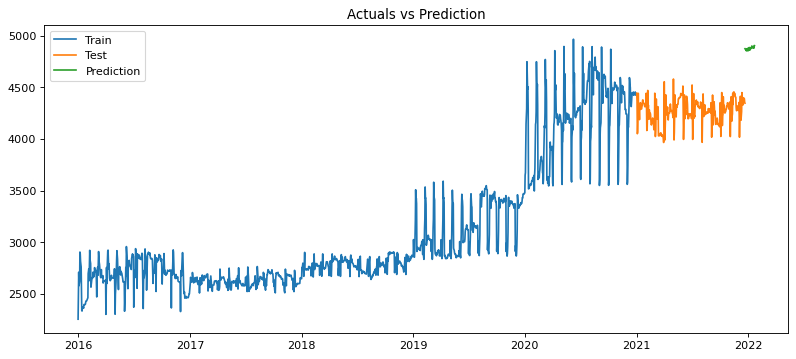

In [151]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['price'], label = 'Train')
plt.plot(test['price'], label='Test')
plt.plot(forecast_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

# Holt Method

In [152]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [153]:
'''Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.
#### Set the value of Alpha and define m (Time Period)'''
m = 22
alpha = 1/(2*m)

C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='date'>

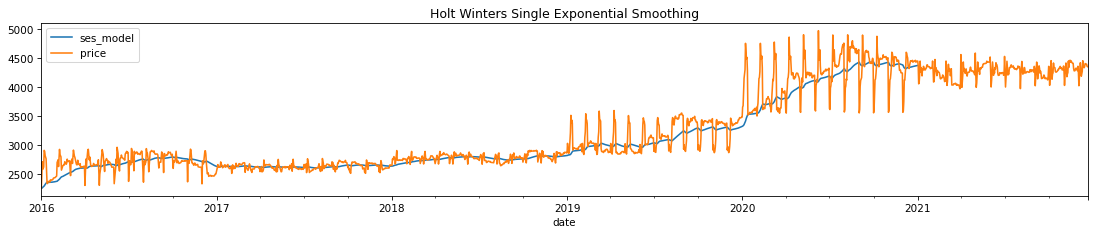

In [154]:
# Single/Simple Exponential Method
df['ses_model'] = SimpleExpSmoothing(train["price"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
df[['ses_model','price']].plot(title='Holt Winters Single Exponential Smoothing', legend=True)
# df2['ses_model']

C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend'}, xlabel='date'>

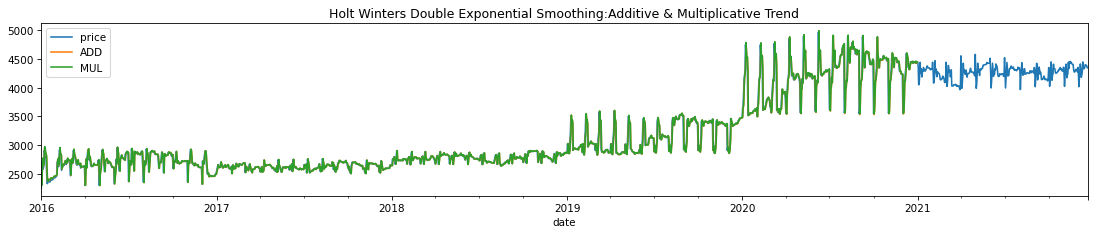

In [156]:
df['ADD'] = ExponentialSmoothing(train['price'],trend='add').fit().fittedvalues
df['MUL'] = ExponentialSmoothing(train['price'],trend='mul').fit().fittedvalues
df[['price','ADD','MUL']].plot(title='Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend')

In [157]:
# Fit the model tend='mul', season='mul'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=11).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


date
2021-01-01    4447.825799
2021-01-02    4458.678150
2021-01-03    4475.692605
2021-01-04    4479.016860
2021-01-05    4489.476108
                 ...     
2021-12-17    6887.488618
2021-12-18    6880.975954
2021-12-19    6892.681596
2021-12-20    6909.499206
2021-12-21    6935.866070
Length: 355, dtype: float64


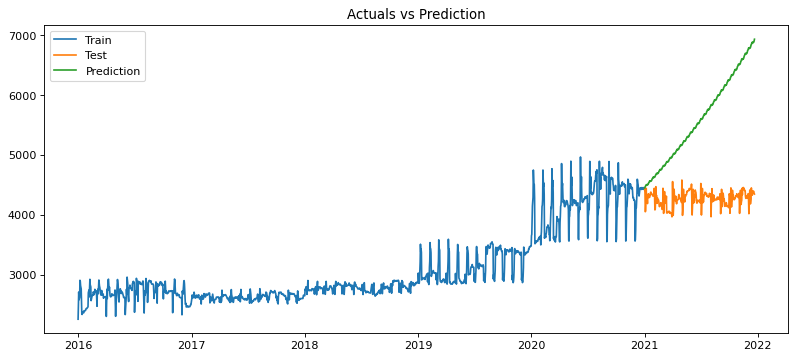

In [158]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [159]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  2278628.8795362017
Root Mean Squared Error (RMSE) =  1509.51
Mean Absolute Error (MAE)  =  1337.0113894453302
Mean Absolute Percentage Error (MAPE)  =  0.31341602407038244


In [160]:
# Fit the model tend='add', season='mul'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]  

 # To print ouput in date format
print(test_predictions)

C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


date
2021-01-01    4439.166839
2021-01-02    4418.847237
2021-01-03    4406.838508
2021-01-04    4407.442391
2021-01-05    4415.950302
                 ...     
2021-12-17    5059.650726
2021-12-18    5060.066258
2021-12-19    5069.555856
2021-12-20    5083.892046
2021-12-21    5068.997245
Length: 355, dtype: float64


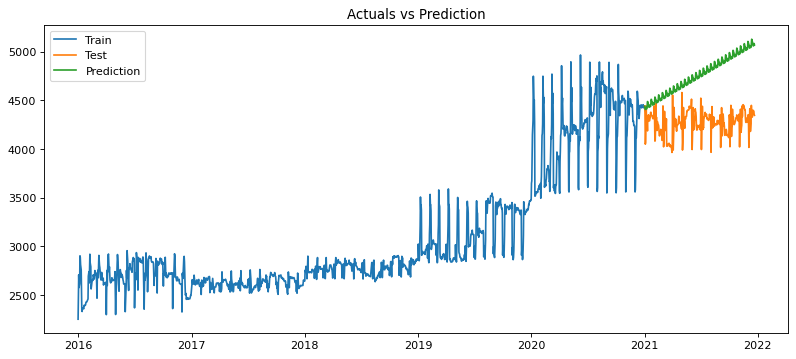

In [161]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [162]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  284802.70936885837
Root Mean Squared Error (RMSE) =  533.67
Mean Absolute Error (MAE)  =  491.918215720926
Mean Absolute Percentage Error (MAPE)  =  0.11586470128597158


In [163]:
# Fit the model tend='mul', season='add'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


date
2021-01-01    4449.805882
2021-01-02    4447.399345
2021-01-03    4450.028158
2021-01-04    4458.197580
2021-01-05    4471.159052
                 ...     
2021-12-17    6787.910926
2021-12-18    6798.908978
2021-12-19    6814.702502
2021-12-20    6833.682160
2021-12-21    6829.496840
Length: 355, dtype: float64


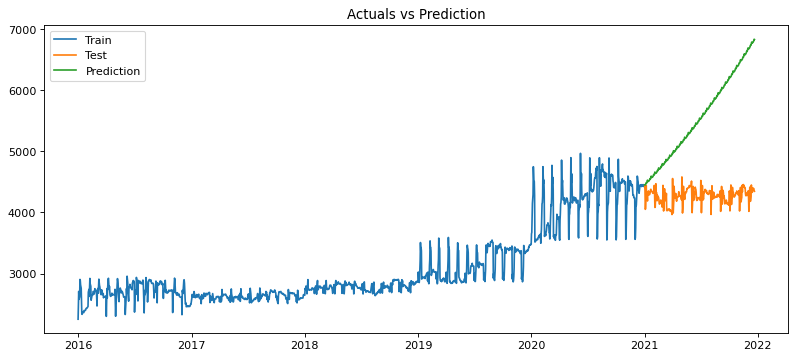

In [164]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [165]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  2125084.860317267
Root Mean Squared Error (RMSE) =  1457.77
Mean Absolute Error (MAE)  =  1291.4998130360757
Mean Absolute Percentage Error (MAPE)  =  0.3027707933531898


In [166]:
# Fit the model tend='add', season='add'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=10).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

C:\Users\Superman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


date
2021-01-01    4473.664767
2021-01-02    4487.045146
2021-01-03    4487.944909
2021-01-04    4481.078268
2021-01-05    4475.437859
                 ...     
2021-12-17    5557.869955
2021-12-18    5571.250334
2021-12-19    5572.150097
2021-12-20    5565.283456
2021-12-21    5559.643047
Length: 355, dtype: float64


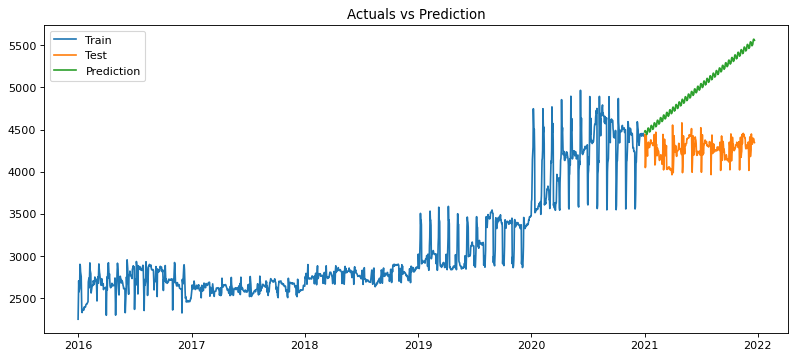

In [167]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [168]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  642694.9858379425
Root Mean Squared Error (RMSE) =  801.68
Mean Absolute Error (MAE)  =  736.1842370216787
Mean Absolute Percentage Error (MAPE)  =  0.1729986135516375


In [169]:
df['EMA'] = train['price'].ewm(span=22).mean()

In [170]:
df['EMA']

date
2016-01-01    2252.600000
2016-01-02    2358.138636
2016-01-03    2485.550585
2016-01-04    2511.848585
2016-01-05    2532.287586
                 ...     
2021-12-17            NaN
2021-12-18            NaN
2021-12-19            NaN
2021-12-20            NaN
2021-12-21            NaN
Name: EMA, Length: 2182, dtype: float64

In [171]:
df['EMA_t'] = test['price'].ewm(span=22).mean()

In [172]:
df['EMA_t']

date
2016-01-01            NaN
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05            NaN
                 ...     
2021-12-17    4324.030529
2021-12-18    4329.723526
2021-12-19    4334.921481
2021-12-20    4336.589178
2021-12-21    4337.450989
Name: EMA_t, Length: 2182, dtype: float64

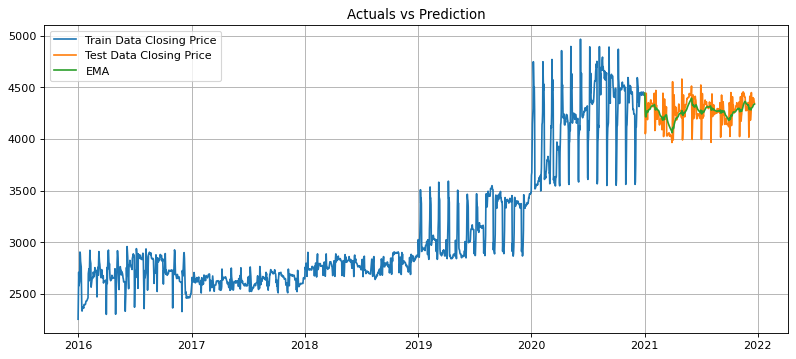

In [173]:
plt.figure(figsize=(12,5), dpi=80)
plt.grid(True)
plt.plot(train['price'],label='Train Data Closing Price')
plt.plot(test['price'],label='Test Data Closing Price')
plt.plot(df['EMA_t'],label='EMA')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.legend(loc=2)

In [174]:
df['EMA_t'].dropna()

date
2021-01-01    4443.100000
2021-01-02    4402.431818
2021-01-03    4274.229663
2021-01-04    4214.811582
2021-01-05    4213.095690
                 ...     
2021-12-17    4324.030529
2021-12-18    4329.723526
2021-12-19    4334.921481
2021-12-20    4336.589178
2021-12-21    4337.450989
Name: EMA_t, Length: 355, dtype: float64

In [175]:
mse = mean_squared_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  8401.060523832122
Root Mean Squared Error (RMSE) =  91.66
Mean Absolute Error (MAE)  =  66.8213045119925
Mean Absolute Percentage Error (MAPE)  =  0.015729767829439883
